Importing all the necessary libraries for **EDA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

We first read the data file named as train_data.csv and stored it as a **dataframe** using pandas library, and further we will explore the data that is we will know **About the** Dataset

In [3]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')
print("Numbmer of rows in the dataset: ", train_df.shape[0])
print("Numbmer of columns in the dataset: ", train_df.shape[1])
train_df.head()

Numbmer of rows in the dataset:  29165
Numbmer of columns in the dataset:  20


,ID,Gender,Car,Property,children_count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment_length,Has a mobile phone,work_phone,Phone,Email,Job title,Family_member_count,Account age,Risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2,-17,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2,-1,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4,-38,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1,-11,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1,-41,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Car                  29165 non-null  object 
 3   Property             29165 non-null  object 
 4   children_count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment_length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  work_phone           29165 non-null  int64  
 14  Phone                29165 non-null  int64  
 15  Email                29165 non-null 

Let us see the total **null values** in each column

In [5]:
train_df.isnull().sum()

ID                        0
Gender                    0
Car                       0
Property                  0
children_count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment_length         0
Has a mobile phone        0
work_phone                0
Phone                     0
Email                     0
Job title              9027
Family_member_count       0
Account age               0
Risk                      0
dtype: int64

Now we will find all **unique values** in every column one by one

In [6]:
train_df['Employment status'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [7]:
train_df['Marital status'].unique()

array(['Married', 'Single / not married', 'Separated', 'Civil marriage',
       'Widow'], dtype=object)

In [8]:
train_df['Dwelling'].unique()

array(['With parents', 'House / apartment', 'Municipal apartment',
       'Rented apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [9]:
train_df['Job title'].value_counts(dropna=False)

Job title
NaN                      9027
Laborers                 5004
Core staff               2866
Sales staff              2773
Managers                 2422
Drivers                  1722
High skill tech staff    1133
Accountants               998
Medicine staff            956
Cooking staff             521
Security staff            464
Cleaning staff            425
Private service staff     287
Low-skill Laborers        138
Waiters/barmen staff      127
Secretaries               122
HR staff                   72
Realty agents              60
IT staff                   48
Name: count, dtype: int64

In [10]:
train_df['Job title'].fillna('unspecified',inplace=True)
test_df['Job title'].fillna('unspecified',inplace=True)
train_df['Job title'].value_counts(dropna=False)

Job title
unspecified              9027
Laborers                 5004
Core staff               2866
Sales staff              2773
Managers                 2422
Drivers                  1722
High skill tech staff    1133
Accountants               998
Medicine staff            956
Cooking staff             521
Security staff            464
Cleaning staff            425
Private service staff     287
Low-skill Laborers        138
Waiters/barmen staff      127
Secretaries               122
HR staff                   72
Realty agents              60
IT staff                   48
Name: count, dtype: int64

In [11]:
train_df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,29165.0,5.078232e+06,41824.000708,5008804.0,5009254.28,5009711.28,5010183.92,5010641.56,5018455.4,5023460.4,5042047.0,5074666.0,5114629.0,5139491.8,5146012.8,5146573.44,5148897.48,5149382.72,5149817.36,5150485.0
children_count,29165.0,4.307903e-01,0.741882,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.00,2.00,2.00,3.00,19.0
Income,29165.0,1.868904e+05,101409.644327,27000.0,54000.00,67500.00,67500.00,67500.00,76500.0,90000.0,121500.0,157500.0,225000.0,315000.0,360000.0,382500.00,405000.00,450000.00,540000.00,1575000.0
Age,29165.0,-1.597948e+04,4202.997485,-25152.0,-24190.80,-23758.00,-23483.00,-23286.00,-23021.0,-22011.0,-19444.0,-15565.0,-12475.0,-10454.0,-9873.0,-9662.00,-9388.84,-9122.00,-8737.00,-7705.0
Employment_length,29165.0,5.925776e+04,137655.883458,-15713.0,-10715.76,-9269.00,-8375.00,-7627.00,-7264.0,-5355.0,-3153.0,-1557.0,-412.0,365243.0,365243.0,365243.00,365243.00,365243.00,365243.00,365243.0
Has a mobile phone,29165.0,1.000000e+00,0.000000,1.0,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.0
work_phone,29165.0,2.243100e-01,0.417134,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,1.00,1.00,1.00,1.0
Phone,29165.0,2.949769e-01,0.456040,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.0
Email,29165.0,9.027944e-02,0.286587,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00,1.00,1.00,1.00,1.0
Family_member_count,29165.0,2.197531e+00,0.912189,1.0,1.00,1.00,1.00,1.00,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.00,4.00,4.00,5.00,20.0


In the dataset `train_data.csv`, numerous rows are duplicates, differing only in their 'ID' values. Removing these duplicates is crucial for clearer **Exploratory Data Analysis (EDA)** results and to ensure each applicant's record appears only once in the dataset, reducing redundancy and maintaining data integrity. Here is an example of such a case:

In [12]:
train_df.loc[train_df["Employment_length"]==-2696][train_df.Age== -9766]

,ID,Gender,Car,Property,children_count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment_length,Has a mobile phone,work_phone,Phone,Email,Job title,Family_member_count,Account age,Risk
18,5091715,F,Y,Y,1,157500.0,Working,Higher education,Married,House / apartment,-9766,-2696,1,1,0,0,Sales staff,3,-23,0
8896,5091716,F,Y,Y,1,157500.0,Working,Higher education,Married,House / apartment,-9766,-2696,1,1,0,0,Sales staff,3,-13,0
14375,5091713,F,Y,Y,1,157500.0,Working,Higher education,Married,House / apartment,-9766,-2696,1,1,0,0,Sales staff,3,-59,0
14925,5091711,F,Y,Y,1,157500.0,Working,Higher education,Married,House / apartment,-9766,-2696,1,1,0,0,Sales staff,3,-23,0
16949,5091710,F,Y,Y,1,157500.0,Working,Higher education,Married,House / apartment,-9766,-2696,1,1,0,0,Sales staff,3,-10,0


Now we will delete all those duplicates using the **drop_duplicates** function, from the DataFrame train_df, considering all columns except the 'ID' column, and retain only the first occurrence of each duplicate row. The result is stored in a new DataFrame assigned to the variable train_df.

In [13]:
train_df = train_df.drop_duplicates(subset = train_df.columns[1:], keep='first', inplace=False)
train_df.loc[train_df.Age== -9766]

,ID,Gender,Car,Property,children_count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment_length,Has a mobile phone,work_phone,Phone,Email,Job title,Family_member_count,Account age,Risk
18,5091715,F,Y,Y,1,157500.0,Working,Higher education,Married,House / apartment,-9766,-2696,1,1,0,0,Sales staff,3,-23,0
4052,5053973,F,Y,N,0,337500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9766,-303,1,1,0,1,unspecified,1,-14,0
8896,5091716,F,Y,Y,1,157500.0,Working,Higher education,Married,House / apartment,-9766,-2696,1,1,0,0,Sales staff,3,-13,0
11808,5053971,F,Y,N,0,337500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9766,-303,1,1,0,1,unspecified,1,-43,0
11885,5053970,F,Y,N,0,337500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9766,-303,1,1,0,1,unspecified,1,-46,0
12663,5053969,F,Y,N,0,337500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9766,-303,1,1,0,1,unspecified,1,-49,0
14375,5091713,F,Y,Y,1,157500.0,Working,Higher education,Married,House / apartment,-9766,-2696,1,1,0,0,Sales staff,3,-59,0
16949,5091710,F,Y,Y,1,157500.0,Working,Higher education,Married,House / apartment,-9766,-2696,1,1,0,0,Sales staff,3,-10,0
19542,5065335,M,N,Y,0,202500.0,Commercial associate,Lower secondary,Married,Rented apartment,-9766,-1935,1,0,1,0,Sales staff,2,-14,0
27020,5065334,M,N,Y,0,202500.0,Commercial associate,Lower secondary,Married,Rented apartment,-9766,-1935,1,0,1,0,Sales staff,2,-26,0


The dataset includes **seven binary features**: Gender, Car, Property, Mobile, Work_phone, Phone, and Email. Since every applicant has a mobile, the **'Has a mobile phone'** feature is irrelevant and can be safely removed from the dataset without impacting the analysis or processing steps.

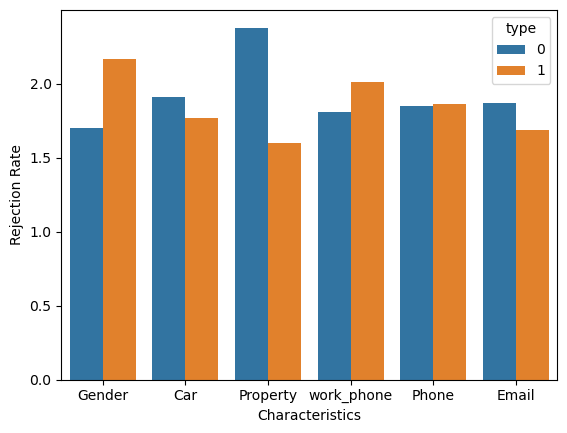

The Difference in rejection rates at value 0 and 1: 
[0.4607484950443528, 0.1389662292622651, 0.7827430786671101, 0.20078441650831702, 0.00945036878806027, 0.18631105342092136]


,Characteristics,type,Rejection Rate,count,Reject_count
0,Gender,0,1.701911,17686,301
1,Gender,1,2.162660,8693,188
2,Car,0,1.906212,16420,313
3,Car,1,1.767246,9959,176
4,Property,0,2.378217,8704,207
5,Property,1,1.595474,17675,282
6,work_phone,0,1.808672,20457,370
7,work_phone,1,2.009456,5922,119
8,Phone,0,1.850955,18585,344
9,Phone,1,1.860405,7794,145


In [14]:
binary_ft = ['Gender', 'Car', 'Property', 'work_phone', 'Phone', 'Email']
binary_df = train_df[binary_ft+['Risk']].replace('Y', 1).replace('N', 0).replace('M', 1).replace('F', 0)
temp = []
diff=[]
for feature in binary_ft:
    a=0
    for one_type in [0, 1]:
        temp.append({'Characteristics': feature,
                          'type': str(one_type),
                          'Rejection Rate': len(binary_df[binary_df[feature]==one_type][binary_df.Risk==1])/len(binary_df[binary_df[feature]==one_type])*100,
                          'count': len(binary_df[binary_df[feature]==one_type]),
                          'Reject_count': len(binary_df[binary_df[feature]==one_type][binary_df.Risk==1])
                         })
        a = abs((len(binary_df[binary_df[feature]==one_type][binary_df.Risk==1])/len(binary_df[binary_df[feature]==one_type])*100)-a)
    diff.append(a)
group_binary = pd.DataFrame.from_dict(temp)
sns.barplot(x="Characteristics", y="Rejection Rate", hue="type", data=group_binary)
plt.show()
print("The Difference in rejection rates at value 0 and 1: ")
print(diff)
group_binary

From the figure above and the Differences in the rejection_rate, we can notice that **Gender and Property** are **high value columns** followed by **work_phone** for credit approval, but **Phone, Email and Car** are **not**.

The Dataset has **5 digital features namely** : children_count, Income, Age, Employement_length (number of days employed) and Family_member_count. children_count and Family_member_count are features with a small scale since these values don't exceed the count of **25**.

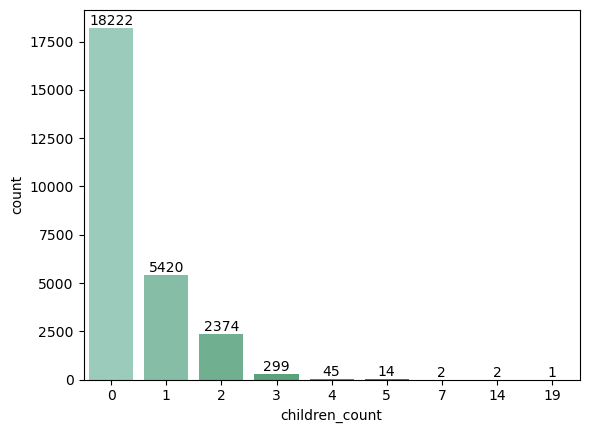

In [15]:
sns.countplot(x="children_count", data=train_df, palette="BuGn_d")
children_count = train_df.children_count.apply(int).value_counts().sort_index()
for a,b in zip(range(len(children_count)), children_count):
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.show()

Now as per the plot output formed we can see that people with 0,1 and 2 children are more and ones with more than 3 are comparatively and collectively lesser in count and hence may set the rejection_rate a bit higher, while it will be same for 0,1 and 2 as shown below:

In [16]:
children_4_count = [children_count[0], children_count[1], children_count[2], children_count[3:].sum()]
print("Categorical count : ", children_4_count)
children_4_count_reject = [len(train_df[train_df.children_count==0][train_df.Risk==1]),
                           len(train_df[train_df.children_count==1][train_df.Risk==1]),
                           len(train_df[train_df.children_count==2][train_df.Risk==1]),
                           len(train_df[train_df.children_count>=3][train_df.Risk==1])]

children_count_df = pd.DataFrame.from_dict({'children_count':children_4_count, 'reject_count':children_4_count_reject})
children_count_df['approved_count'] = children_count_df.children_count - children_count_df.reject_count
children_count_df['Rejection Rate'] = children_count_df.reject_count/children_count_df.children_count*100
children_count_df

Categorical count :  [18222, 5420, 2374, 363]


,children_count,reject_count,approved_count,Rejection Rate
0,18222,343,17879,1.882340
1,5420,96,5324,1.771218
2,2374,38,2336,1.600674
3,363,12,351,3.305785


Families having more than **3 children** are likely to **reject** the credit card proposal followed by no childrens!
We will now do the same process on **Family_member_count** as we did on children_count in order to know how much it affects the risk

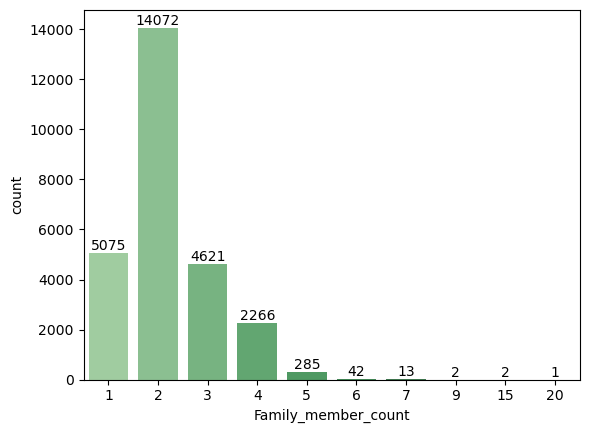

In [17]:
sns.countplot(x="Family_member_count", data=train_df, palette="Greens_d")
family_members_count = train_df.Family_member_count.apply(int).value_counts().sort_index()
for a,b in zip(range(len(family_members_count)), family_members_count):
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.show()

In [18]:
family_4_members = [family_members_count[1], family_members_count[2], family_members_count[3], family_members_count[3:].sum()]
family_4_members_reject = [len(train_df[train_df.Family_member_count==1.0][train_df.Risk==1]),
                           len(train_df[train_df.Family_member_count==2.0][train_df.Risk==1]),
                           len(train_df[train_df.Family_member_count==3.0][train_df.Risk==1]),
                           len(train_df[train_df.Family_member_count>=4.0][train_df.Risk==1])]

family_members_count_df = pd.DataFrame.from_dict({'family_members_count':family_4_members, 'reject_count':family_4_members_reject})
family_members_count_df['approved_count'] = family_members_count_df.family_members_count - family_members_count_df.reject_count
family_members_count_df['Rejection Rate'] = family_members_count_df.reject_count/family_members_count_df.family_members_count*100
family_members_count_df

,family_members_count,reject_count,approved_count,Rejection Rate
0,5075,114,4961,2.246305
1,14072,247,13825,1.755259
2,4621,83,4538,1.796148
3,2611,45,2566,1.723478


We can clearly see that the ones having **Family_member count** value as **1** are likely to **reject** the credit card proposal! while others all lie in the same range of rejection rates i.e don't affect much, more children means more family members and hence we get almost similar results

Now we will find out the **relation** between count of family members and count of childrens to by seeing all possible combinations existing that is if x is the family member count then out it what is the number of children, rest will be the adults
Families with 2 adults and no children are highest in count followed by singles and others

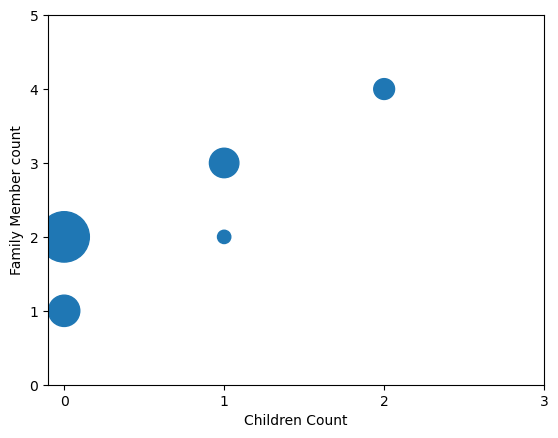

In [19]:
fig = plt.figure()
plot = fig.add_subplot(111)
gp=train_df.groupby(by=['children_count','Family_member_count'])
gp_df = gp.size().reset_index(name='times').sort_values('times', ascending=False)[:5]
gp_df['times_10'] = gp_df['times'].apply(lambda x: x/10)
plot.scatter(gp_df['children_count'], gp_df['Family_member_count'], s=gp_df['times_10'])
plt.xticks(range(4))
plt.yticks(range(6))
plt.xlabel('Children Count')
plt.ylabel('Family Member count')
plt.show()

In [20]:
gp = train_df.groupby(by=['children_count','Family_member_count'])
gp_df = gp.size().reset_index(name='times').sort_values('times', ascending=False)[:5]

gp_df

,children_count,Family_member_count,times
1,0,2,13155
0,0,1,5067
4,1,3,4497
7,2,4,2248
3,1,2,917


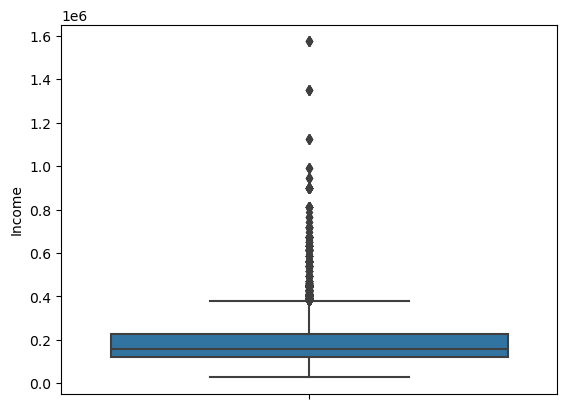

In [21]:
sns.boxplot(train_df,y='Income')
plt.show()

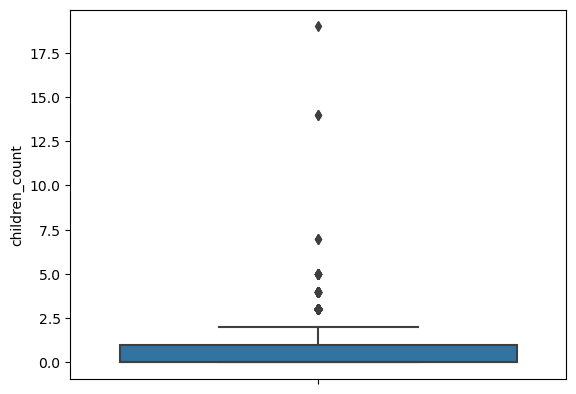

In [22]:
sns.boxplot(train_df,y='children_count')
plt.show()

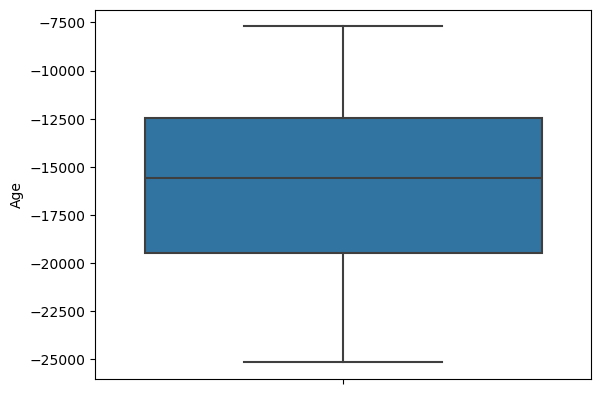

In [23]:
sns.boxplot(train_df, y='Age')
plt.show()

<Axes: ylabel='Employment_length'>

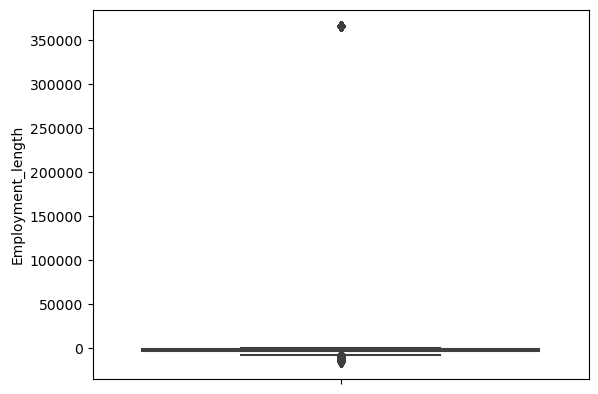

In [24]:
sns.boxplot(data=train_df, y='Employment_length')

We can clearly see that there is an **outlier** which **deviates highly** from the median as well as the interquartile range values, also in our dataset we have only negative values but this value is **positive** and is seen a lot of times as show below and hence we can say that This value likely represents some kind of **placeholder** or special code used to indicate **missing or unknown employment duration** and so we will replace it with 0 to get it in a range

In [25]:
train_df[train_df['Employment_length']>=0]['Employment_length'].value_counts()

Employment_length
365243    4469
Name: count, dtype: int64

In [26]:
emp_mean = train_df.loc[~(train_df.Employment_length==365243),'Employment_length'].mean()
print(emp_mean)
train_df['Employment_length'].replace(365243,emp_mean,inplace=True)
test_df['Employment_length'].replace(365243,emp_mean,inplace=True)

-2650.2465997261525


In [27]:
train_df[train_df['Employment_length']>=0]['Employment_length'].value_counts()

Series([], Name: count, dtype: int64)

<Axes: ylabel='Employment_length'>

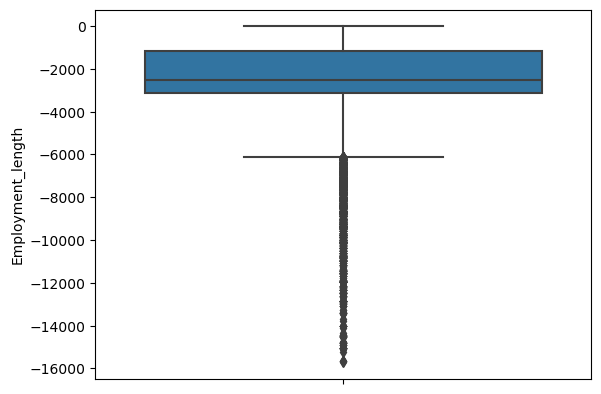

In [28]:
sns.boxplot(data=train_df, y='Employment_length')

Now all the values in **Age and Employment_length** are in **days and also negative** so we will convert them to **positive and get them in years** and then remove both the columns with old values, also the account **age is negative** and so we will convert it to **positive**

In [29]:
train_df['Age_yrs'] = round(-train_df['Age']/365.250,0)
train_df['Employment_yrs'] = round(-train_df['Employment_length']/365.250,0)
train_df.loc[train_df['Employment_yrs']<0,'Employment_yrs']=0
train_df['Account age'] = -train_df['Account age']

test_df['Age_yrs'] = round(-test_df['Age']/365.250,0)
test_df['Employment_yrs'] = round(-test_df['Employment_length']/365.250,0)
test_df.loc[test_df['Employment_yrs']<0,'Employment_yrs']=0
test_df['Account age'] = -test_df['Account age']

In [30]:
train_df.drop(columns=["Age","Employment_length"],inplace=True)
test_df.drop(columns=["Age","Employment_length"],inplace=True)

In [31]:
train_df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,26379.0,5.078255e+06,41770.596165,5008804.0,5009271.78,5009734.68,5010206.34,5010660.24,5018482.9,5023496.8,5042012.5,5078787.0,5114604.0,5139379.2,5146000.1,5146573.88,5148895.66,5149370.32,5149821.88,5150485.0
children_count,26379.0,4.312521e-01,0.744532,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.00,2.00,2.00,3.00,19.0
Income,26379.0,1.859667e+05,100131.393939,27000.0,54000.00,67500.00,67500.00,67500.00,76500.0,90000.0,121500.0,157500.0,225000.0,315000.0,360000.0,382500.00,405000.00,450000.00,540000.00,1575000.0
Has a mobile phone,26379.0,1.000000e+00,0.000000,1.0,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.0
work_phone,26379.0,2.244968e-01,0.417258,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,1.00,1.00,1.00,1.0
Phone,26379.0,2.954623e-01,0.456259,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.0
Email,26379.0,9.003374e-02,0.286236,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00,1.00,1.00,1.00,1.0
Family_member_count,26379.0,2.198036e+00,0.914236,1.0,1.00,1.00,1.00,1.00,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.00,4.00,4.00,5.00,20.0
Account age,26379.0,2.605955e+01,16.468618,0.0,1.00,1.00,2.00,2.00,3.0,5.0,12.0,24.0,39.0,50.0,55.0,56.00,57.00,58.00,59.00,60.0
Risk,26379.0,1.853747e-02,0.134887,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,1.00,1.0


In [32]:
train_df.dtypes

ID                       int64
Gender                  object
Car                     object
Property                object
children_count           int64
Income                 float64
Employment status       object
Education level         object
Marital status          object
Dwelling                object
Has a mobile phone       int64
work_phone               int64
Phone                    int64
Email                    int64
Job title               object
Family_member_count      int64
Account age              int64
Risk                     int64
Age_yrs                float64
Employment_yrs         float64
dtype: object

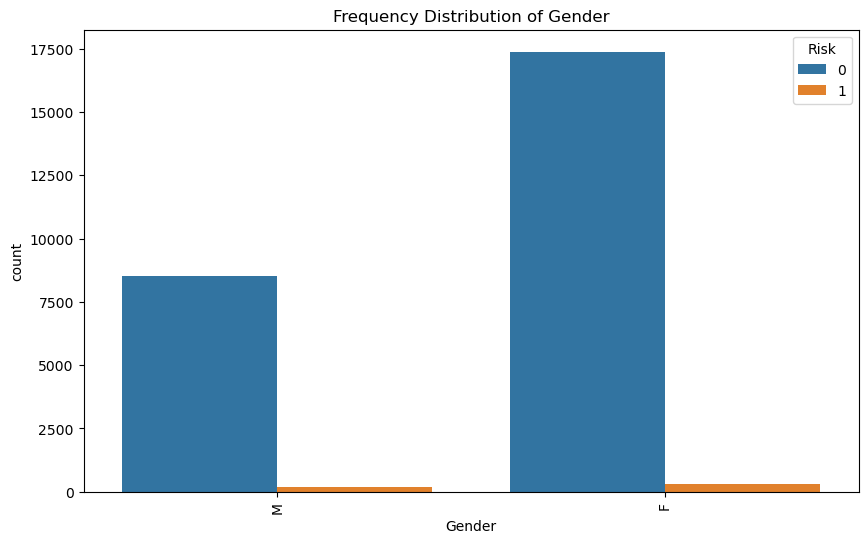

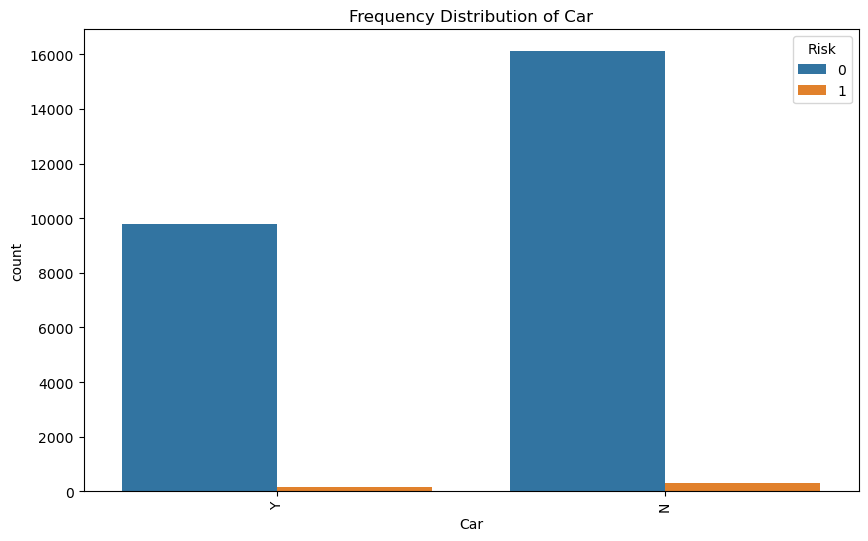

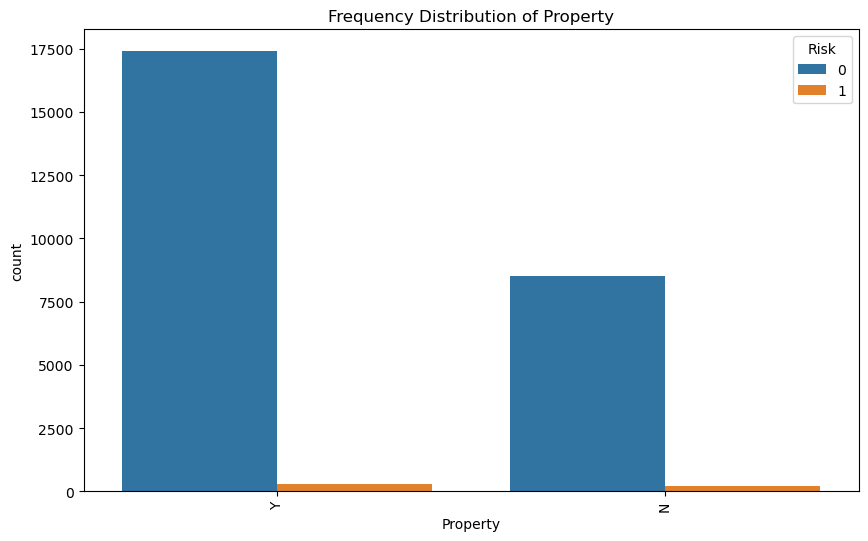

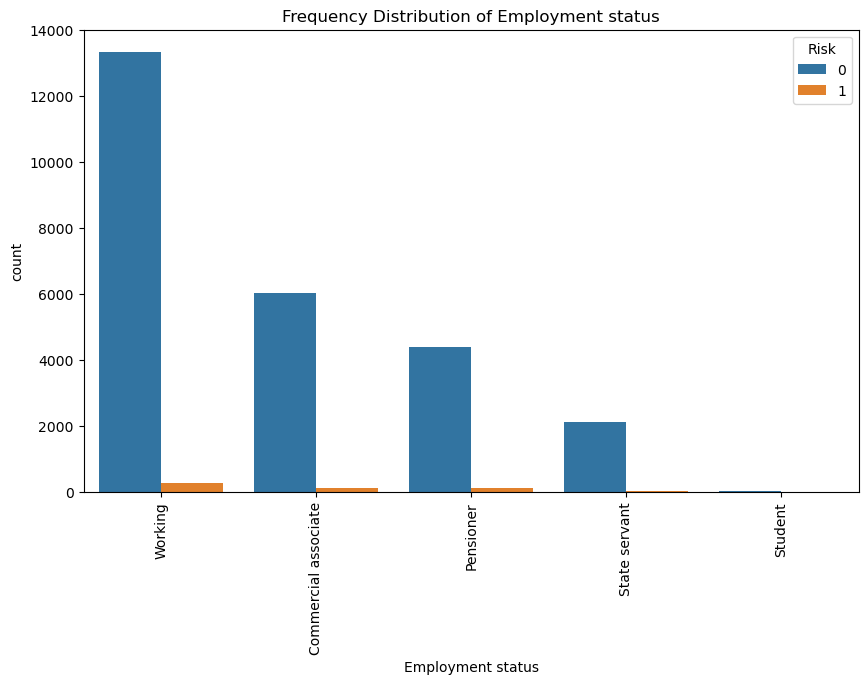

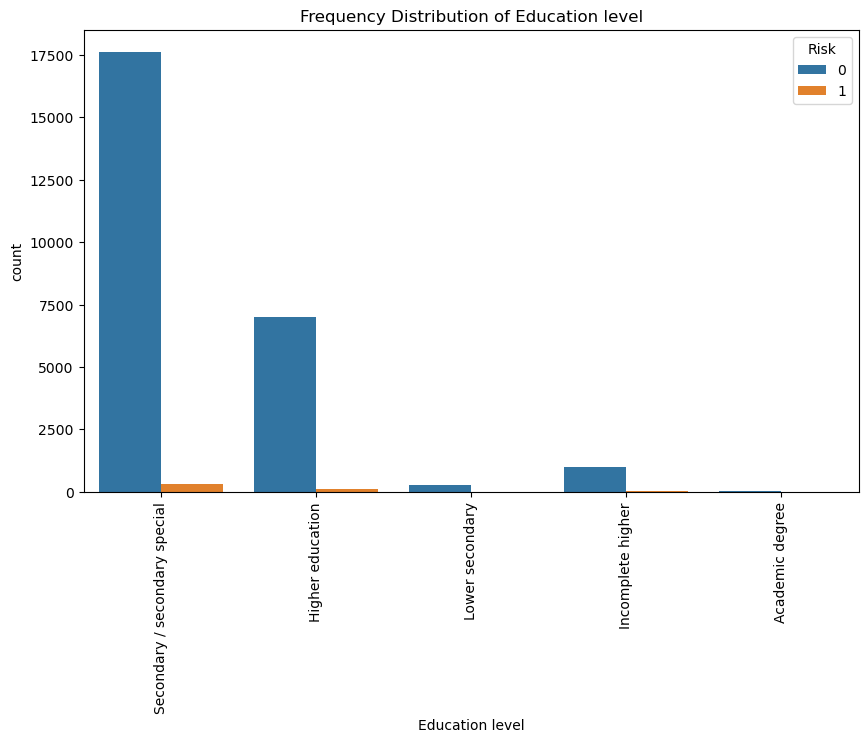

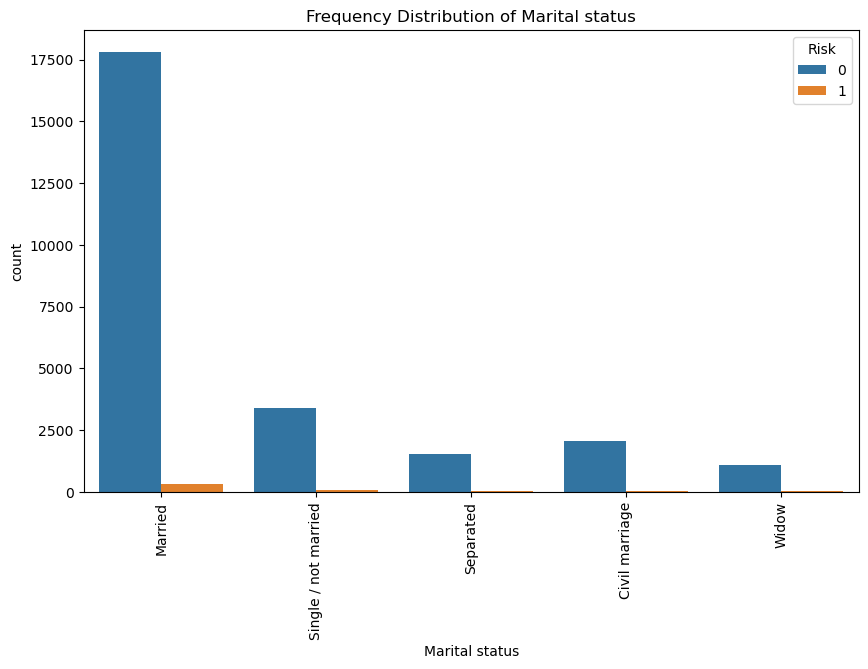

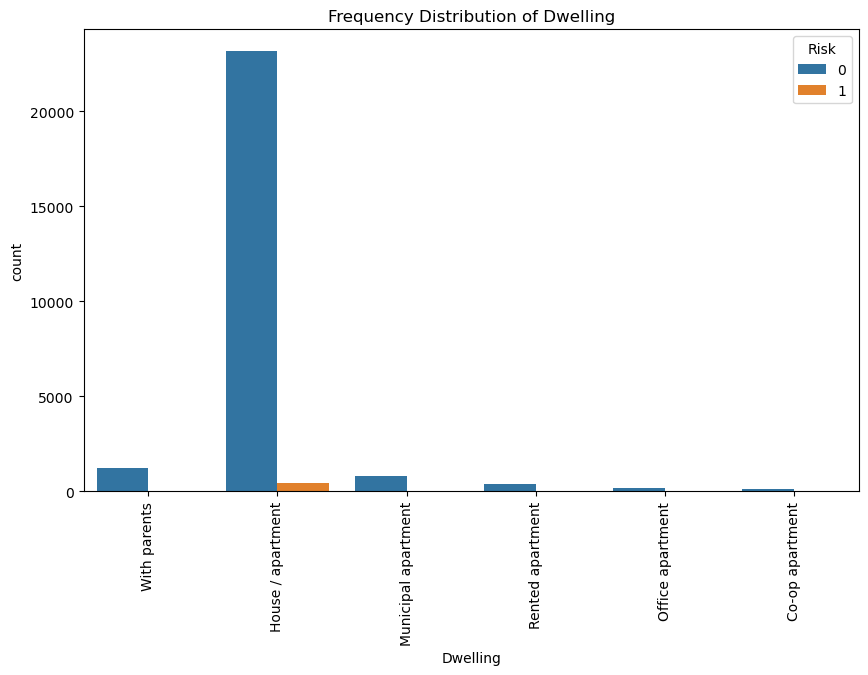

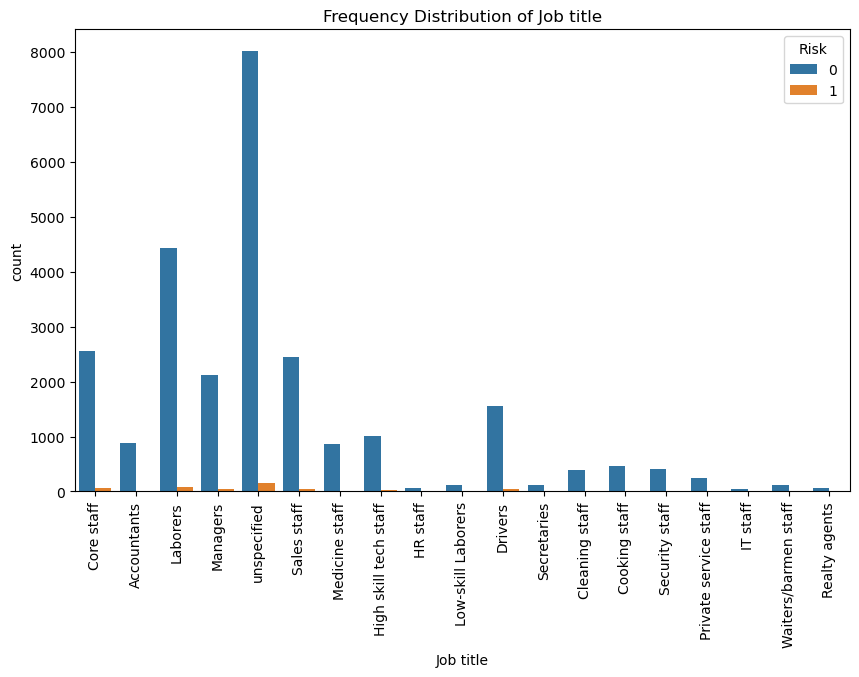

In [33]:
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    train_df['Risk'] = train_df['Risk'].astype(str)
    test_df['Risk'] = test_df['Risk'].astype(str)
    sns.countplot(data=train_df, x=col, hue='Risk')
    
    plt.title(f'Frequency Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()
    print("\n")

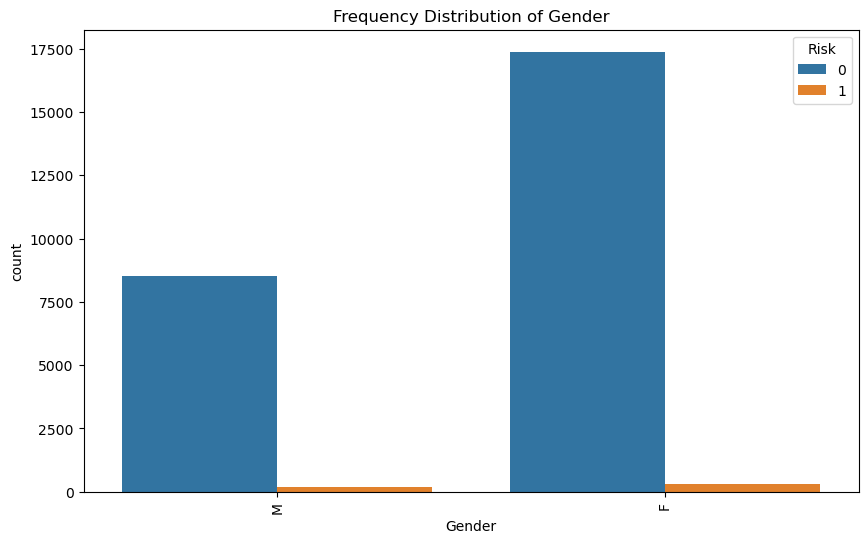

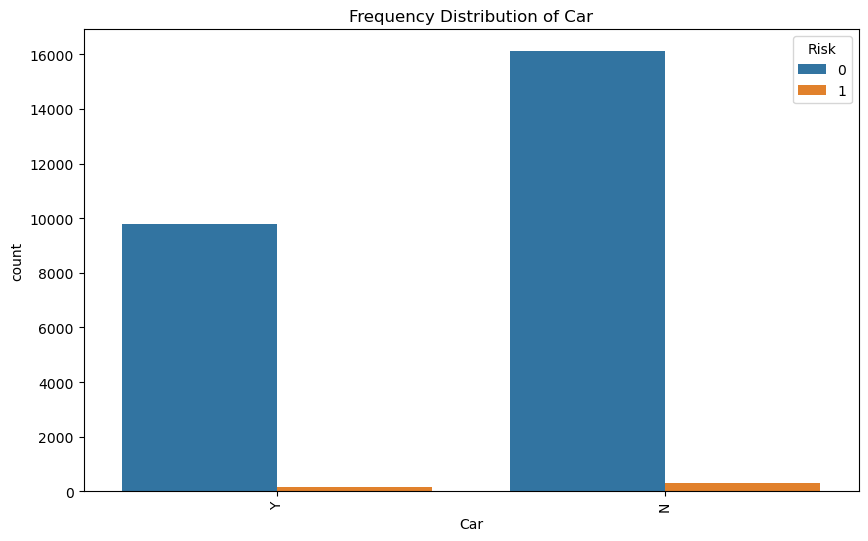

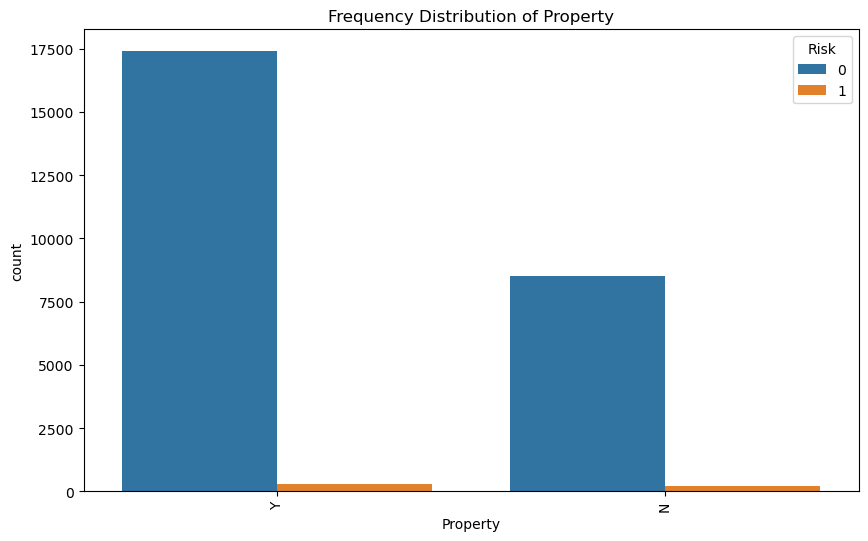

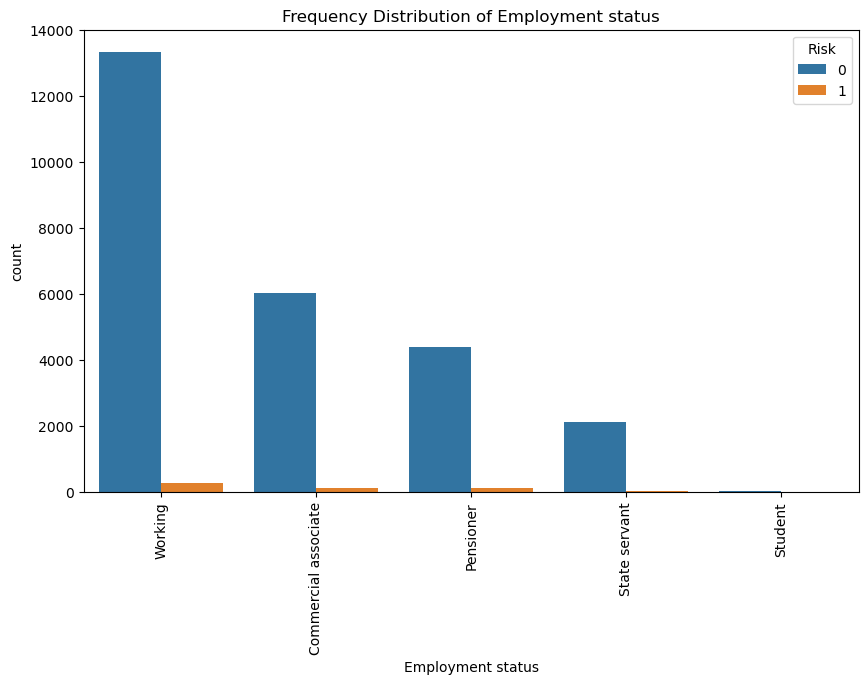

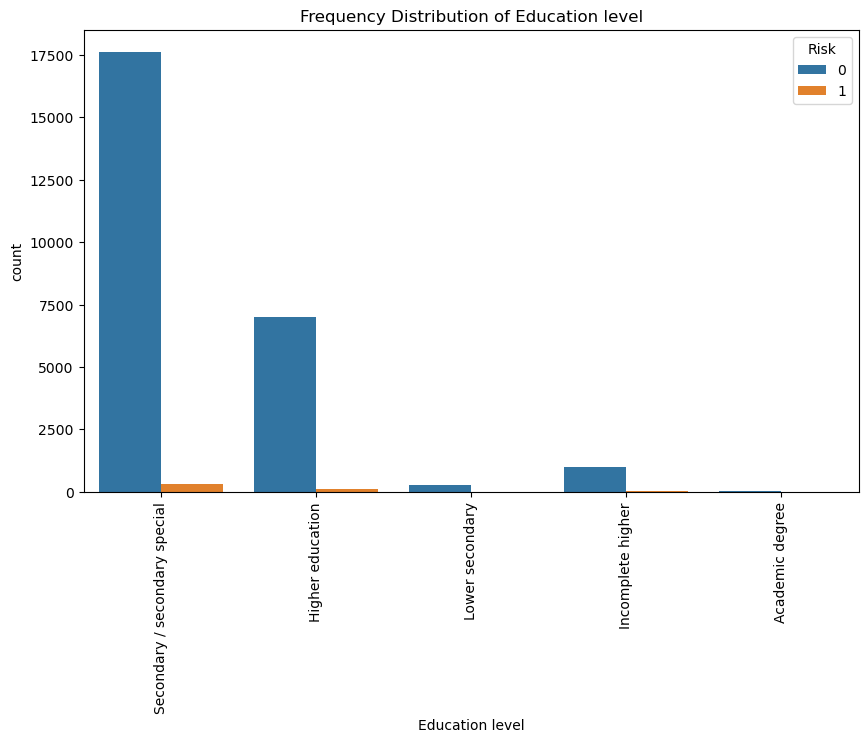

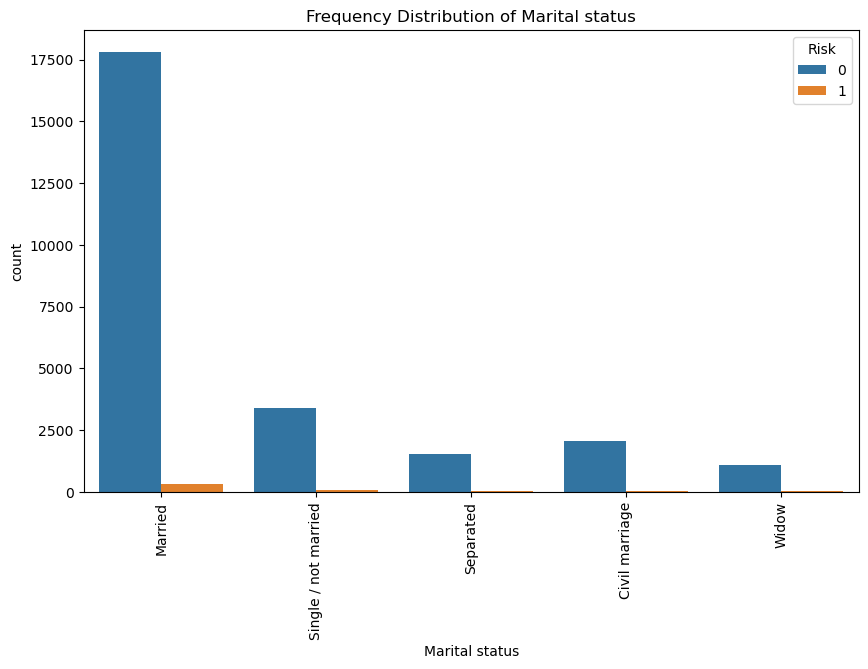

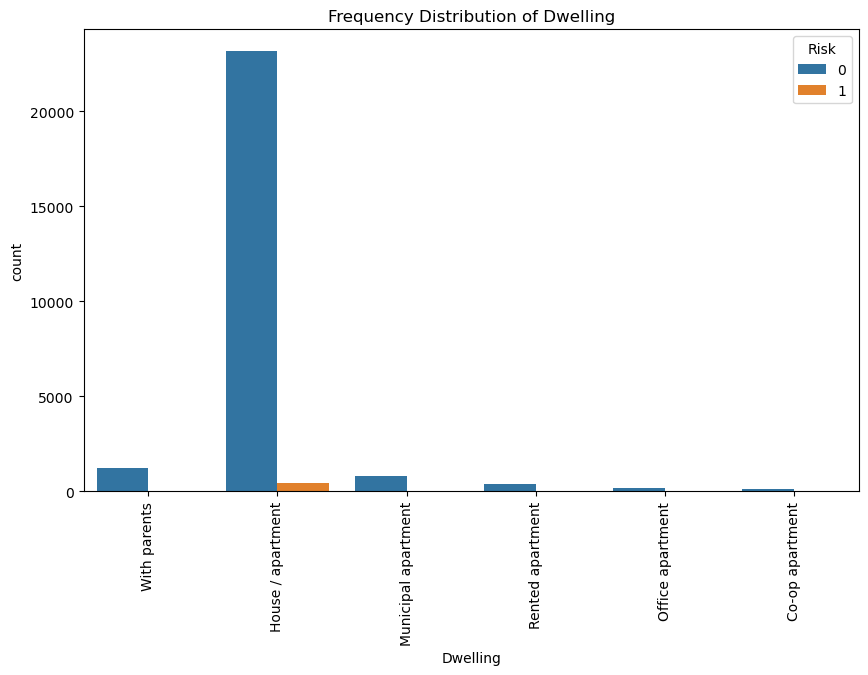

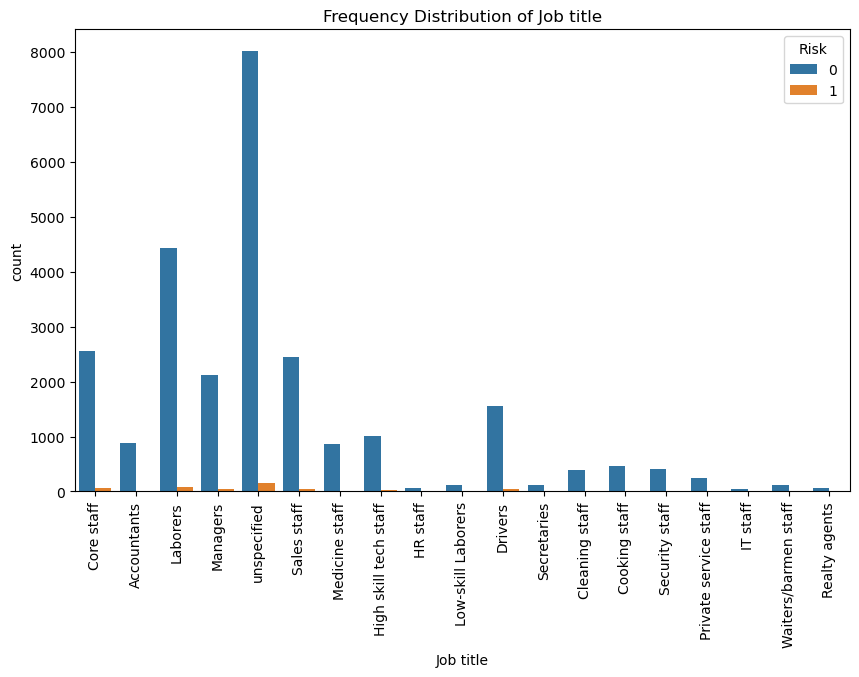

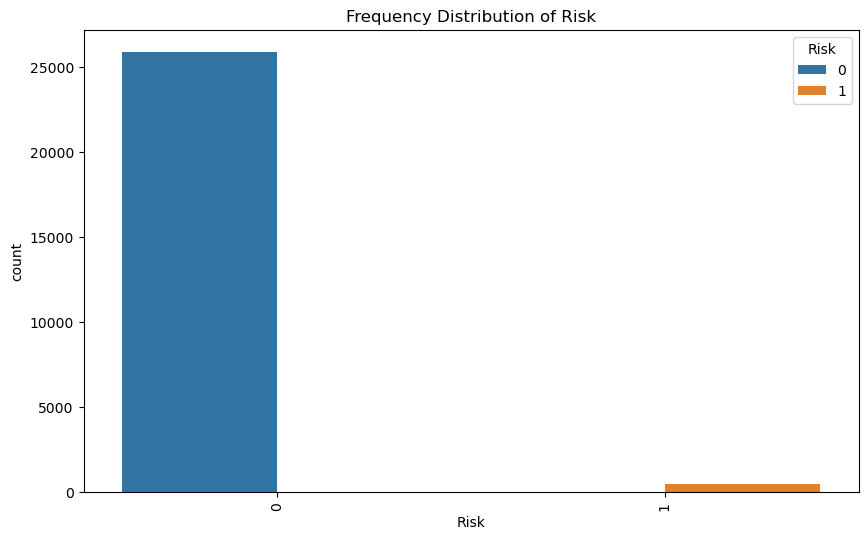

In [34]:
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(10, 6))
    train_df['Risk'] = train_df['Risk'].astype(str)
    test_df['Risk'] = test_df['Risk'].astype(str)
    sns.countplot(data=train_df, x=col, hue='Risk')
    plt.title(f'Frequency Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()
    print("\n")


In [35]:
columns_to_scale = ['Income', 'Age_yrs','Employment_yrs', 'Family_member_count']
train = train_df.copy()
st=StandardScaler()
train[columns_to_scale] = st.fit_transform(train[columns_to_scale])
test = test_df.copy()
test[columns_to_scale] = st.fit_transform(test[columns_to_scale])

In [36]:
train

,ID,Gender,Car,Property,children_count,Income,Employment status,Education level,Marital status,Dwelling,Has a mobile phone,work_phone,Phone,Email,Job title,Family_member_count,Account age,Risk,Age_yrs,Employment_yrs
0,5037048,M,Y,Y,0,-0.509008,Working,Secondary / secondary special,Married,With parents,1,0,0,0,Core staff,-0.216618,17,0,0.105770,0.299879
1,5044630,F,Y,N,1,-0.509008,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,0,Accountants,-0.216618,1,0,-1.365579,-0.376536
2,5079079,F,N,Y,2,-0.059590,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,1.971042,38,0,-0.759729,1.314502
3,5112872,F,Y,Y,0,1.738082,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,1,Managers,-1.310448,11,0,1.144370,-0.207433
4,5105858,F,N,N,0,0.839246,Working,Secondary / secondary special,Separated,House / apartment,1,0,1,0,unspecified,-1.310448,41,0,0.019220,-1.052952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29159,5091339,F,N,Y,0,-0.509008,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,0,Cooking staff,-0.216618,3,0,-1.192479,-0.545640
29161,5029193,F,N,Y,1,-0.509008,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Core staff,0.877212,24,0,-0.067330,2.667333
29162,5047710,F,N,Y,0,-1.093251,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Managers,-0.216618,29,0,0.451970,0.299879
29163,5009886,F,N,Y,0,-0.284299,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,1,0,1,0,unspecified,-0.216618,37,0,1.317470,-0.038329


In [37]:
columns_to_encode = ['Gender','Car','Education level', 'Property', 'Employment status', 'Marital status', 'Dwelling', 'work_phone', 'Phone', 'Email', 'Job title']
train_df=pd.get_dummies(train_df,columns=columns_to_encode,dtype='int')
test_df=pd.get_dummies(test_df,columns=columns_to_encode,dtype='int')
train_df

,ID,children_count,Income,Has a mobile phone,Family_member_count,Account age,Risk,Age_yrs,Employment_yrs,Gender_F,...,Job title_Low-skill Laborers,Job title_Managers,Job title_Medicine staff,Job title_Private service staff,Job title_Realty agents,Job title_Sales staff,Job title_Secretaries,Job title_Security staff,Job title_Waiters/barmen staff,Job title_unspecified
0,5037048,0,135000.0,1,2,17,0,45.0,9.0,0,...,0,0,0,0,0,0,0,0,0,0
1,5044630,1,135000.0,1,2,1,0,28.0,5.0,1,...,0,0,0,0,0,0,0,0,0,0
2,5079079,2,180000.0,1,4,38,0,35.0,15.0,1,...,0,0,0,0,0,0,0,0,0,0
3,5112872,0,360000.0,1,1,11,0,57.0,6.0,1,...,0,1,0,0,0,0,0,0,0,0
4,5105858,0,270000.0,1,1,41,0,44.0,1.0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29159,5091339,0,135000.0,1,2,3,0,30.0,4.0,1,...,0,0,0,0,0,0,0,0,0,0
29161,5029193,1,135000.0,1,3,24,0,43.0,23.0,1,...,0,0,0,0,0,0,0,0,0,0
29162,5047710,0,76500.0,1,2,29,0,49.0,9.0,1,...,0,1,0,0,0,0,0,0,0,0
29163,5009886,0,157500.0,1,2,37,0,59.0,7.0,1,...,0,0,0,0,0,0,0,0,0,1


In [38]:
train_df.describe()

,ID,children_count,Income,Has a mobile phone,Family_member_count,Account age,Age_yrs,Employment_yrs,Gender_F,Gender_M,...,Job title_Low-skill Laborers,Job title_Managers,Job title_Medicine staff,Job title_Private service staff,Job title_Realty agents,Job title_Sales staff,Job title_Secretaries,Job title_Security staff,Job title_Waiters/barmen staff,Job title_unspecified
count,2.637900e+04,26379.000000,2.637900e+04,26379.0,26379.000000,26379.000000,26379.000000,26379.000000,26379.000000,26379.000000,...,26379.000000,26379.000000,26379.000000,26379.000000,26379.000000,26379.000000,26379.000000,26379.000000,26379.000000,26379.000000
mean,5.078255e+06,0.431252,1.859667e+05,1.0,2.198036,26.059555,43.777929,7.226658,0.670458,0.329542,...,0.004587,0.081883,0.033322,0.009477,0.002085,0.094583,0.004322,0.016149,0.004435,0.309223
std,4.177060e+04,0.744532,1.001314e+05,0.0,0.914236,16.468618,11.554240,5.913637,0.470056,0.470056,...,0.067573,0.274192,0.179479,0.096891,0.045615,0.292643,0.065598,0.126052,0.066452,0.462182
min,5.008804e+06,0.000000,2.700000e+04,1.0,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.042012e+06,0.000000,1.215000e+05,1.0,2.000000,12.000000,34.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.078787e+06,0.000000,1.575000e+05,1.0,2.000000,24.000000,43.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.114604e+06,1.000000,2.250000e+05,1.0,3.000000,39.000000,53.000000,9.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.150485e+06,19.000000,1.575000e+06,1.0,20.000000,60.000000,69.000000,43.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
y = train_df['Risk']
x = train_df.drop(['Risk'],axis=1)
Y = test_df['Risk']
X = test_df.drop(['Risk'],axis=1)
X.head()

,ID,children_count,Income,Has a mobile phone,Family_member_count,Account age,Age_yrs,Employment_yrs,Gender_F,Gender_M,...,Job title_Low-skill Laborers,Job title_Managers,Job title_Medicine staff,Job title_Private service staff,Job title_Realty agents,Job title_Sales staff,Job title_Secretaries,Job title_Security staff,Job title_Waiters/barmen staff,Job title_unspecified
0,5091261,0,202500.0,1,1,6,46.0,5.0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5096963,0,675000.0,1,2,16,50.0,3.0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,5087880,0,234000.0,1,2,52,60.0,14.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5021949,0,445500.0,1,2,54,34.0,1.0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,5105705,0,225000.0,1,2,48,33.0,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, X_test, y_train, Y_test = x, X, y ,Y

In [41]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(X_test)
print(Y_test)

0       0
1       0
2       0
3       0
4       0
       ..
7287    0
7288    0
7289    0
7290    0
7291    0
Name: Risk, Length: 7292, dtype: object


In [42]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
true_negative = confusion_matrix[0,0]
false_positive = confusion_matrix[0,1]
false_negative = confusion_matrix[1,0]
true_positive = confusion_matrix[1,1]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (true_positive + true_negative) / len(Y_test)

print("Classification report: ")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Accuracy:", accuracy)
print("\n")
print("Classification report using function: ")
print(metrics.classification_report(Y_test, y_pred))

Classification report: 
Precision: nan
Recall: 0.0
F1-score: nan
Accuracy: 0.9839550191991223


Classification report using function: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7175
           1       0.00      0.00      0.00       117

    accuracy                           0.98      7292
   macro avg       0.49      0.50      0.50      7292
weighted avg       0.97      0.98      0.98      7292



In [43]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
dt=model.predict(X_test)

print(metrics.classification_report(Y_test,dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7175
           1       0.20      0.22      0.21       117

    accuracy                           0.97      7292
   macro avg       0.59      0.60      0.60      7292
weighted avg       0.97      0.97      0.97      7292



In [44]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, y_pred)
print(conf_matrix)

[[7175    0]
 [ 117    0]]


<module 'matplotlib.pyplot' from 'C:\\Users\\vedxn\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

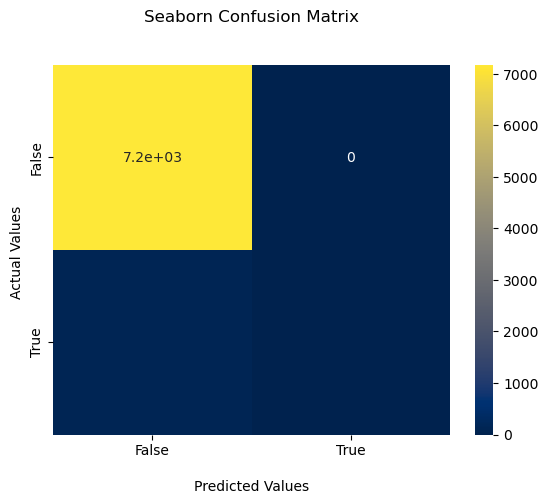

In [45]:
axes = sns.heatmap(conf_matrix, annot=True, cmap='cividis')

axes.set_title('Seaborn Confusion Matrix\n\n');
axes.set_xlabel('\nPredicted Values')
axes.set_ylabel('Actual Values ');

axes.xaxis.set_ticklabels(['False','True'])
axes.yaxis.set_ticklabels(['False','True'])
plt

**We see that there is a high data imbalance and it needs to be balanced. We will Handle the Imbalancing of data using SMOTE**

In [46]:
col = list(train_df.columns)
type(col)
col.remove('Risk')
x_trainr, X_testr, y_trainr, Y_testr = x, X, y ,Y

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,sampling_strategy='auto')
x_train_resampled, y_train_resampled = smote.fit_resample(x_trainr, y_trainr)

In [48]:
model = LogisticRegression()
model.fit(x_train_resampled,y_train_resampled)
y_pred = model.predict(X_testr)
print(y_pred)

['0' '0' '1' ... '0' '1' '1']


In [49]:
print(metrics.classification_report(Y_testr,y_pred))
conf_matrix = confusion_matrix(Y_testr, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.99      0.60      0.74      7175
           1       0.02      0.51      0.04       117

    accuracy                           0.59      7292
   macro avg       0.50      0.55      0.39      7292
weighted avg       0.97      0.59      0.73      7292

[[4273 2902]
 [  57   60]]


<module 'matplotlib.pyplot' from 'C:\\Users\\vedxn\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

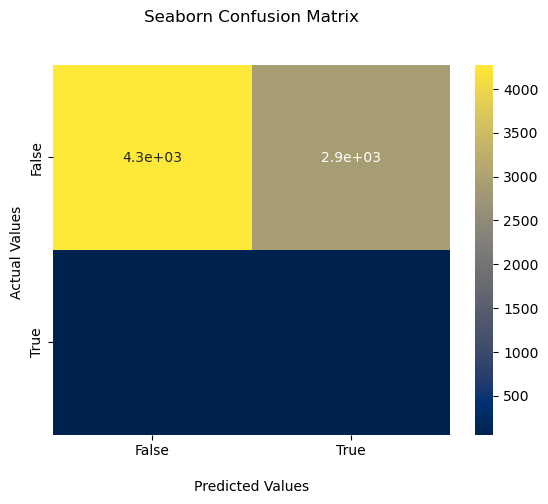

In [50]:
axes = sns.heatmap(conf_matrix, annot=True, cmap='cividis')

axes.set_title('Seaborn Confusion Matrix\n\n');
axes.set_xlabel('\nPredicted Values')
axes.set_ylabel('Actual Values ');

axes.xaxis.set_ticklabels(['False','True'])
axes.yaxis.set_ticklabels(['False','True'])
plt